In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

#%matplotlib notebook

[-1.47168753e-06]


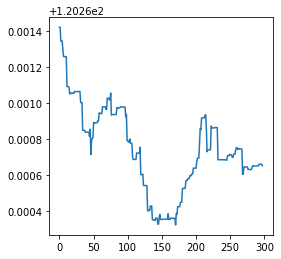

In [8]:
all_rewards = np.load("rewards.npy")[-1000:]
x_data, y_data = list(range(len(all_rewards))), all_rewards  

reg.fit(np.array(x_data).reshape(-1, 1), y_data)
print(reg.coef_)

figure = plt.figure(figsize=(4, 4))
line, = plt.plot(x_data, y_data)

In [21]:
from matplotlib import pyplot
from matplotlib.animation import FuncAnimation

all_rewards = np.load("rewards.npy")
x_data, y_data = list(range(len(all_rewards))), all_rewards  

figure = plt.figure(figsize=(5, 5))
line, = plt.plot(x_data, y_data)

def update(frame):
    all_rewards = np.load("rewards.npy")
    x_data, y_data = list(range(len(all_rewards))), all_rewards    
    line.set_data(x_data, y_data)
    figure.gca().relim()
    figure.gca().autoscale_view()
    return line,

animation = FuncAnimation(figure, update, interval=200)

plt.show()

<IPython.core.display.Javascript object>